# 
Daily Climate Time Series Data

In this project I am going to make a model to predict the humidity with a Linear Regression

First I am going to explore the data.

Import the libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

Read the data.

The data was obtained from Kaggle.

https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data

In [ ]:
df_train = pd.read_csv("/work/DailyDelhiClimateTrain.csv")
df_test = pd.read_csv("/work/DailyDelhiClimateTest.csv")

"The Dataset is fully dedicated for the developers who want to train the model on Weather Forecasting for Indian climate. This dataset provides data from 1st January 2013 to 24th April 2017 in the city of Delhi, India. The 4 parameters here are
meantemp, humidity, wind_speed, meanpressure."

## Explore

We explore the information of the dataframe.

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [ ]:
df_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


Now, we are going to select the columns date and humidity because we are going to work with those.

In [ ]:
df_train = df_train[["date","humidity"]]
df_train.head()

,date,humidity
0,2013-01-01,84.500000
1,2013-01-02,92.000000
2,2013-01-03,87.000000
3,2013-01-04,71.333333
4,2013-01-05,86.833333


We set the date as the dataframe index.

In [ ]:
df_train=df_train.set_index("date")

We are going to explore the data. First, we are going to make a box plot of the humidity.

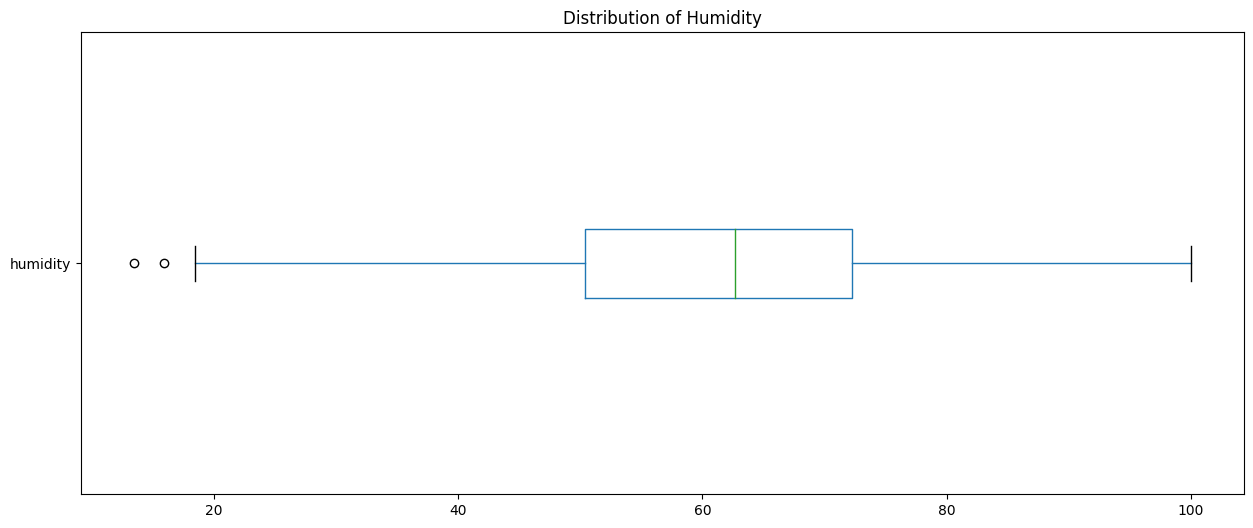

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
df_train["humidity"].plot(kind = "box", vert=False, title="Distribution of Humidity",ax=ax);


In this figure we can see that there is not many outliers.

Now we are going to make a time series plot of the humidity.

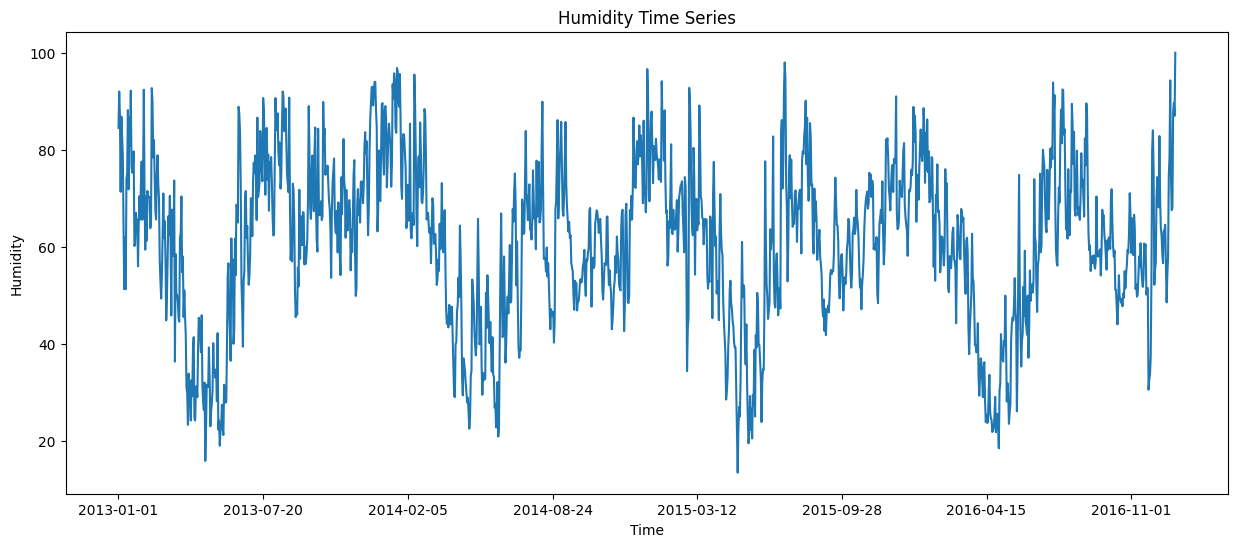

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
df_train["humidity"].plot(xlabel = "Time", ylabel = "Humidity", title="Humidity Time Series", ax=ax);

Also, we are going to make a time series plot of the rolling average of the humidity. We are going to use a window size of 7, the number of days of a week.

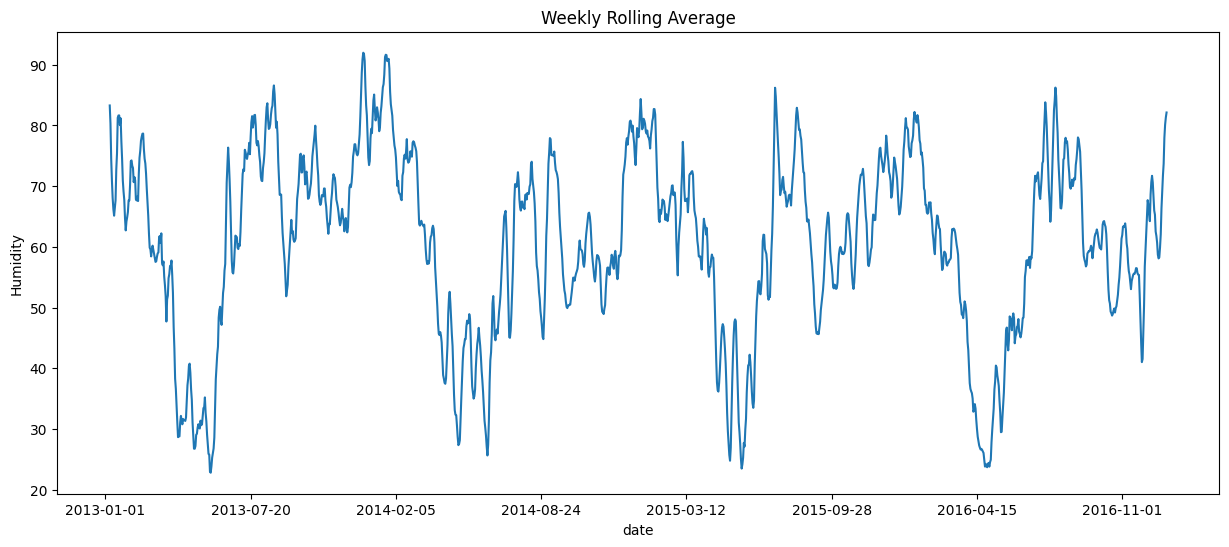

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
df_train["humidity"].rolling(7).mean().plot(ax=ax, ylabel="Humidity", title="Weekly Rolling Average");

Now, we are going to create a new column in the dataframe called humidity.L1 that cointains the reading of humidity of the previous hour. Then we are going to drop the null rows from the df.

In [ ]:
df_train["humidity.L1"] = df_train["humidity"].shift(1)

In [ ]:
df_train.dropna(inplace = True)

In [ ]:
df_train.head()

,humidity,humidity.L1
date,,
2013-01-02,92.000000,84.500000
2013-01-03,87.000000,92.000000
2013-01-04,71.333333,87.000000
2013-01-05,86.833333,71.333333
2013-01-06,82.800000,86.833333


Now we create a correlation matrix for df. We can see if there is a correlation between humidity and humidity one day later.

In [ ]:
df_train.corr()

,humidity,humidity.L1
humidity,1.000000,0.878608
humidity.L1,0.878608,1.000000


We can see that there is a correlation between humidity and humidity one day later. We can see the same in the next scatter plot between humidity and humidity.L1

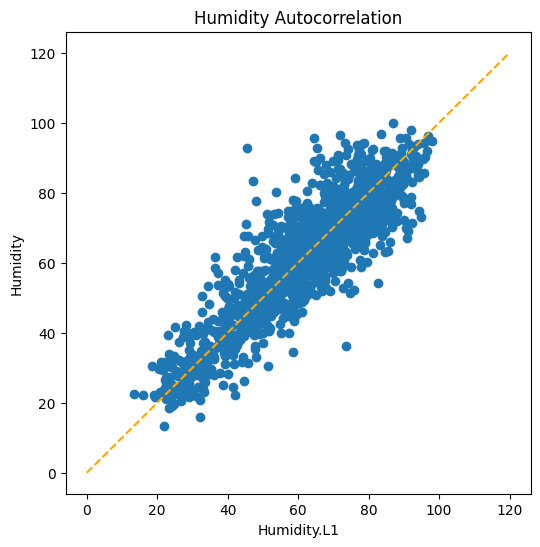

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x=df_train["humidity.L1"], y=df_train["humidity"])
ax.plot([0,120],[0,120], linestyle="--", color="orange")
plt.xlabel("Humidity.L1")
plt.ylabel("Humidity")
plt.title("Humidity Autocorrelation");

There is high correlation between Humidity and Humidity.L1

## Model

Split

We are going to make the test and train data frames.

In [ ]:
df_test = df_test[["date","humidity"]]
df_test=df_test.set_index("date")
df_test["humidity.L1"] = df_test["humidity"].shift(1)
df_test.dropna(inplace = True)

In [ ]:
target = "humidity"
y_train = df_train[target]
X_train = df_train.drop(columns=target)

In [ ]:
target = "humidity"
y_test = df_test[target]
X_test = df_test.drop(columns=target)

## Build the model

First the Baseline is calculated.

In [ ]:
y_mean=y_train.mean()

In [ ]:
y_pred_baseline=[y_mean]*len(y_train)

Now it is calculated the mean absolute error of the baseline.

In [ ]:
mae_baseline = mean_absolute_error(y_pred_baseline, y_train)

print("Baseline MAE:", round(mae_baseline, 2))

Baseline MAE: 13.42


## Iterate

Now we are going to instantiate a LinearRegression model and fit it to the training data.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate

To evaluate the model we are going to calculate the training and test mean absolute error for the model.

In [ ]:
training_mae = mean_absolute_error(y_train, model.predict(X_train))
test_mae = mean_absolute_error(y_test, model.predict(X_test))
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(test_mae, 2))

Training MAE: 5.99
Test MAE: 5.86


We can see that we beat the baseline MAE.

## Communicate Results

Now we extract the coefficient and the intercept of the model and we print the equation of the model.

In [ ]:
intercept = model.intercept_.round(2)
coefficient = model.coef_.round(2)[0]

print(f"P2 = {intercept} + ({coefficient} * P2.L1)")

P2 = 7.32 + (0.88 * P2.L1)


We create a data frame of predictions with the y_test and y_prdecit.

In [ ]:
df_pred_test = pd.DataFrame(
    {
        "y_test": y_test,
        "y_predict": model.predict(X_test)
    }
)
df_pred_test.head()

,y_test,y_predict
date,,
2017-01-02,77.222222,82.856556
2017-01-03,81.888889,75.249872
2017-01-04,70.050000,79.354932
2017-01-05,74.944444,68.940787
2017-01-06,79.318182,73.246212


Finally we create a time series line plot for the values in the data frame.

In [ ]:
fig = px.line(df_pred_test, labels={"values":"P2"})
fig.show()

In this graphic we can see the red line which is the prediction, and the blue line that is the data of the test. It is possible to see that our model can predict with an error what si going to happen.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1eb1a8b2-eacc-45e9-a77a-b664b85539d1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>